# Category Distribution
This notebook will generate a bar chart showing how much is spent in each category

In [24]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# navigate to the Features folder
import sys
sys.path.append(sys.path[0]+'/../Features') # .. instead of . because we're in the Jupyter Tools folder

# import features
import helper
import category_module

In [25]:
# read the file expenses.csv from Data folder as a dataframe
expenses_df = pd.read_csv('../Data/Expenses.csv')

# convert the column "Amount" to float
expenses_df.Amount = expenses_df.Amount.astype(float)

# convert the column "Date" to datetime
expenses_df.Date = pd.to_datetime(expenses_df.Date)

expenses_df.head()

,Unique ID,Description,Category,Amount,Date,Account,Third Party
0,1676311868042907,Randomly generated expenses for Home,Home,50.0,2015-01-01,Amex Blue Cash Preferred,NaN
1,1676311868043323,Randomly generated expenses for Utilities,Utilities,25.0,2015-01-02,Amex Blue Cash Preferred,Sophia
2,1676311868045289,Randomly generated expenses for Food and Dining,Food and Dining,24.0,2015-01-03,Amex Blue Cash Preferred,NaN
3,1676311868046338,Randomly generated expenses for Kids,Kids,1.0,2015-01-04,Chase Freedom Flex,NaN
4,1676311868046569,Randomly generated expenses for Entertainment,Entertainment,10.0,2015-01-04,Amex Blue Cash Preferred,NaN


In [26]:
# get the sum of each category
sum_category_dict = category_module.sum_ALL_categories(expenses_df, start_time = '2023-01-01', end_time = '2023-12-31')

# convert the dictionary to a dataframe
categories_df = pd.DataFrame(sum_category_dict.items(), columns = ['Category', 'Amount'])

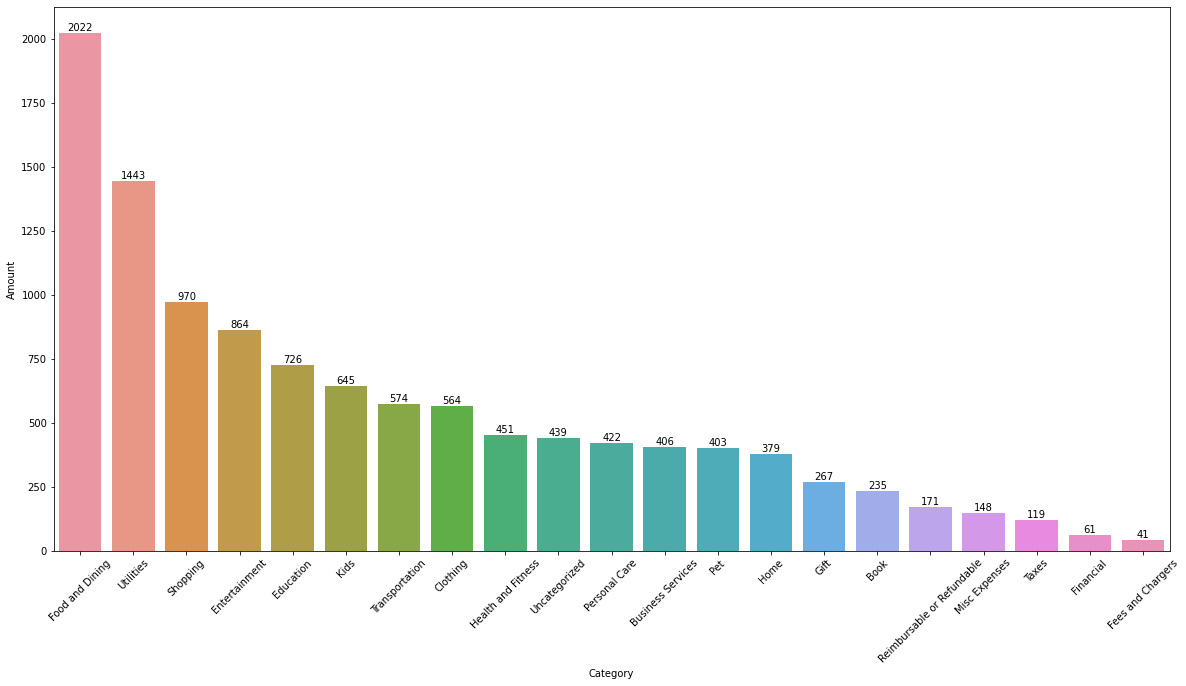

In [28]:
# sort the data
categories_df = categories_df.sort_values(by = ['Amount'], ascending=False)

# create the bar chart
plt.figure(figsize=(20, 10)) # size
plt.xticks(rotation=45)
ax = sns.barplot(x = 'Category', y = 'Amount', data = categories_df)

# shows value on top of each bar
for i in ax.containers:
    ax.bar_label(i,)

plt.show()